In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

(60000, 28, 28)


In [6]:
import numpy as np
import cv2

for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    window_name = 'Random_Sample #' + str(random_num)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [7]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalising
x_train /= 255
x_test /= 255

print('X_train Shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

X_train Shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('Number of Classes:', str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape = input_shape))
model.add(Conv2D(64, kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [11]:
batch_size = 32
epochs = 10

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.5832 - accuracy: 0.8199 - val_loss: 0.2003 - val_accuracy: 0.9422
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2873 - accuracy: 0.9137 - val_loss: 0.1369 - val_accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2142 - accuracy: 0.9362 - val_loss: 0.1043 - val_accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1647 - accuracy: 0.9507 - val_loss: 0.0790 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1374 - accuracy: 0.9589 - val_loss: 0.0688 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1207 - accuracy: 0.9635 - val_loss: 0.0595 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1078 - accuracy: 0.9678 - val_loss: 0.0582 -

[0.20031553506851196, 0.13692617416381836, 0.10429387539625168, 0.07896142452955246, 0.06881823390722275, 0.059515923261642456, 0.05822949856519699, 0.05064714327454567, 0.04600238800048828, 0.04334037005901337]


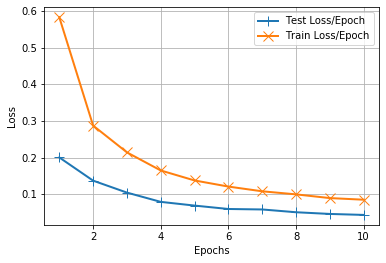

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_val = history_dict['loss']
val_loss = history_dict['val_loss']
print(val_loss)
epochs = range(1, len(loss_val) + 1)

line1 = plt.plot(epochs, val_loss, label='Test Loss/Epoch')
line2 = plt.plot(epochs, loss_val, label='Train Loss/Epoch')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='x', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

{'loss': [0.5832012891769409, 0.287320077419281, 0.2141633778810501, 0.16473287343978882, 0.1374402791261673, 0.12074456363916397, 0.1078212633728981, 0.0994645208120346, 0.08931847661733627, 0.08487609773874283], 'accuracy': [0.8198666572570801, 0.9136999845504761, 0.9362000226974487, 0.9506666660308838, 0.9588833451271057, 0.9635499715805054, 0.9677666425704956, 0.9701666831970215, 0.972350001335144, 0.9750166535377502], 'val_loss': [0.20031553506851196, 0.13692617416381836, 0.10429387539625168, 0.07896142452955246, 0.06881823390722275, 0.059515923261642456, 0.05822949856519699, 0.05064714327454567, 0.04600238800048828, 0.04334037005901337], 'val_accuracy': [0.9422000050544739, 0.9584000110626221, 0.9702000021934509, 0.975600004196167, 0.9783999919891357, 0.9807000160217285, 0.9818999767303467, 0.9854999780654907, 0.9848999977111816, 0.9855999946594238]}


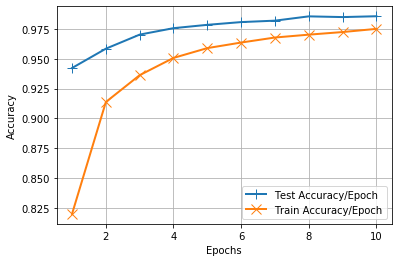

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict)

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss_val) + 1)

line1 = plt.plot(epochs, val_accuracy, label='Test Accuracy/Epoch')
line2 = plt.plot(epochs, accuracy, label='Train Accuracy/Epoch')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='x', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
model.save("mnist_simple_cnn_10Epochs_HandwritingClassification.h5")

In [15]:
from keras.models import load_model

classifier = load_model("mnist_simple_cnn_10Epochs_HandwritingClassification.h5")

In [16]:
import cv2
import numpy as np

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    
for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


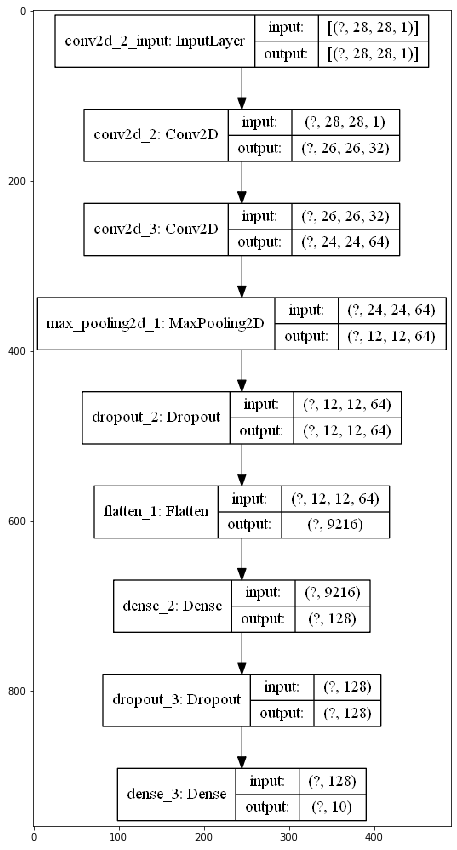

In [17]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Generate the plot
plot_model(model, to_file = 'model_plot.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 